#### Import Package & Load Dataset

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"E:\MINE\beasiswa\2022\DATA BANGLORE\ON BOARDING\EXAM + TASK\6 - STATISTIC FOR DATA SCIENCE\sample_submission.csv")
df

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


#### Data Preprocessing [EDA]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [3]:
df.isnull().sum()

Id           0
SalePrice    0
dtype: int64

In [4]:
hargaRumah = df[['SalePrice']]
hargaRumah.describe()

,SalePrice
count,1459.000000
mean,179183.918243
std,16518.303051
min,135751.318893
25%,168703.011202
50%,179208.665698
75%,186789.409363
max,281643.976117


In [9]:
hargaRumah.median()

SalePrice    179208.665698
dtype: float64

In [10]:
hargaRumah.mode()

,SalePrice
0,174126.297156
1,174388.867433


In [11]:
hargaRumah.var()

SalePrice    2.728543e+08
dtype: float64

In [12]:
hargaRumah.quantile(0.75) - hargaRumah.quantile(0.25)

SalePrice    18086.398162
dtype: float64

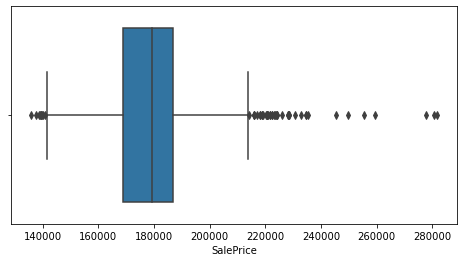

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(x="SalePrice", data=hargaRumah)
plt.show()

Tranformasi data:
1. Jenis distribusi pada data diketahui memiliki skew positif, salah satu cara untuk handle data dapat dengan mengeliminasi 
   outlier.
2. Pada data diketahui tidak terdapat missing value sehingga tidak diperlukan adanya handling missing data, melainkan 
   dibutuhkan proses transformasi data termasuk handling outlier salah satunya dengan zscore atau IQR.  
3. Menganalisa data yang memiliki skew, *sangat disarankan tidak menggunakan MEAN* karena MEAN memiliki sifat not robust atau 
   sensitif dengan data yang memiliki outlier, sehingga proses analisis dapat menggunakan median karena *median bersifat 
   robust*.

#### Data Cleaning | Handling Outliers

In [21]:
#zscore method

from scipy import stats

print(f'Jumlah Baris dengan Outlier: {len(hargaRumah)}')
filtered_entries = np.array([True] * len(hargaRumah))
for i in ['SalePrice']:
    zscore = abs(stats.zscore(hargaRumah[i]))
    filtered_entries = (zscore < 3) & filtered_entries
df = df[filtered_entries]

print(f'Jumlah Hasil Fiter Outlier: {len(hargaRumah)}')


Jumlah Baris dengan Outlier: 1459
Jumlah Hasil Fiter Outlier: 1459


In [22]:
#IQR method

print(f'Jumlah Baris dengan Outlier: {len(hargaRumah)}')
filtered_entries = np.array([True] * len(hargaRumah))
for i in ['SalePrice']:
    Q1 = hargaRumah[i].quantile(0.25)
    Q3 = hargaRumah[i].quantile(0.75)
    IQR = Q3 - Q1
    limitLow = Q1 - (IQR*1.5)
    limitHigh = Q3 + (IQR*1.5)
    
    filtered_entries = ((hargaRumah[i] >= limitLow) & (hargaRumah[i] <= limitHigh)) & filtered_entries
hargaRumah = hargaRumah[filtered_entries]
print(f'Jumlah Hasil Fiter Outlier: {len(hargaRumah)}')

Jumlah Baris dengan Outlier: 1459
Jumlah Hasil Fiter Outlier: 1409


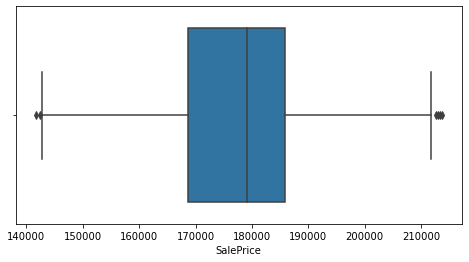

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(x="SalePrice", data=hargaRumah)
plt.show()

#### Visualisasi Data Univariat

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

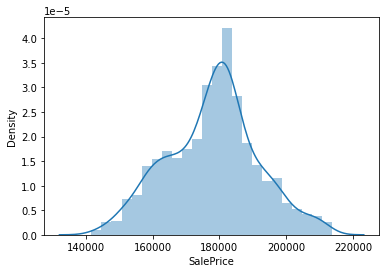

In [33]:
sns.distplot(hargaRumah["SalePrice"])